## Content Based Movie Recommender using TF-IDF

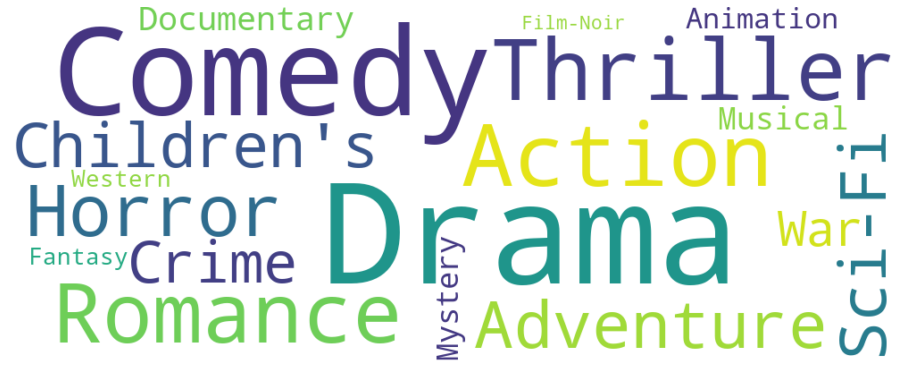

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("/content/clean.csv")

In [3]:
df.head()

,Unnamed: 0,title,cast,crew,genres,keywords,original_language
0,0,toy_story,"['tom_hanks', 'tim_allen', 'don_rickles', 'jim...",['john_lasseter'],"['animation', 'comedy', 'family']","['jealousy', 'toy', 'boy', 'friendship', 'frie...",en
1,1,jumanji,"['robin_williams', 'jonathan_hyde', 'kirsten_d...",['joe_johnston'],"['adventure', 'fantasy', 'family']","['board_game', 'disappearance', 'based_on_chil...",en
2,2,grumpier_old_men,"['walter_matthau', 'jack_lemmon', 'ann_margret...",['howard_deutch'],"['romance', 'comedy']","['fishing', 'best_friend', 'duringcreditssting...",en
3,3,waiting_to_exhale,"['whitney_houston', 'angela_bassett', 'loretta...",['forest_whitaker'],"['comedy', 'drama', 'romance']","['based_on_novel', 'interracial_relationship',...",en
4,4,father_of_the_bride_part_ii,"['steve_martin', 'diane_keaton', 'martin_short...",['charles_shyer'],['comedy'],"['baby', 'midlife_crisis', 'confidence', 'agin...",en


In [10]:
df['bag_of_words'] = df['cast'] + df['keywords'] + df['genres'] + df['crew'] 
df['bag_of_words'] = df['bag_of_words'].apply(lambda x: ''.join(x)) + " " + df['title']
df.bag_of_words.head()

0    ['tom_hanks', 'tim_allen', 'don_rickles', 'jim...
1    ['robin_williams', 'jonathan_hyde', 'kirsten_d...
2    ['walter_matthau', 'jack_lemmon', 'ann_margret...
3    ['whitney_houston', 'angela_bassett', 'loretta...
4    ['steve_martin', 'diane_keaton', 'martin_short...
Name: bag_of_words, dtype: object

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.bag_of_words)
tfidf.get_feature_names()

['10',
 '100_girls',
 '101_dalmatians',
 '101_reykjavik',
 '102_dalmatians',
 '10_rillington_place',
 '10_things_i_hate_about_you',
 '10_to_midnight',
 '11_09_01_september_11',
 '11_11',
 '11_14',
 '12_angry_men',
 '13_ghosts',
 '13_going_on_30',
 '13_rue_madeleine',
 '1492_conquest_of_paradise',
 '15_minutes',
 '15th_century',
 '16th_century',
 '1776',
 '17th_century',
 '18_again_',
 '18th_century',
 '1900',
 '1910s',
 '1920s',
 '1930s',
 '1940s',
 '1941',
 '1950s',
 '1960s',
 '1969',
 '1970s',
 '1980s',
 '19th_century',
 '1_900',
 '2001_a_space_odyssey',
 '2009_lost_memories',
 '200_cigarettes',
 '2010',
 '2046',
 '20_000_leagues_under_the_sea',
 '20_dates',
 '20_million_miles_to_earth',
 '20th_century',
 '21_grams',
 '24_7_twenty_four_seven',
 '24_hour_party_people',
 '25th_hour',
 '28_days',
 '28_days_later',
 '28_up',
 '29th_street',
 '2_days_in_the_valley',
 '2_fast_2_furious',
 '2_or_3_things_i_know_about_her',
 '2ldk',
 '3000_miles_to_graceland',
 '301_302',
 '30_years_to_life'

In [12]:
import unicodedata
import re
def clean_data(value):
    value =  unicodedata.normalize('NFD', value).encode('ascii', 'ignore').decode('ascii')
    x = str.lower(re.sub(r"[^a-zA-Z0-9]+", '_', value.strip().replace(" ","_")))
    if(x != '_'):
        return x 
    else:
        return " "

In [6]:
# Compute cosine similarity between all movie-descriptions
similarity = cosine_similarity(tfidf_matrix)
# Remove self-similarity from matrix
similarity -= np.eye(similarity.shape[0])

In [7]:
def get_content_based_recommendations(title):
    # Get the index of given movie (if exist)
    index = df.reset_index(drop=True)[df.title == clean_data(title)].index
    if len(index) > 0:
        index = index[0]
        n_plot = 10
        # Get indices and scores of similar movies
        similar_movies_index = np.argsort(similarity[index])[::-1][:n_plot]
        similar_movies_score = np.sort(similarity[index])[::-1][:n_plot]

        # Get titles of similar movies
        similar_movie_titles = df.iloc[similar_movies_index].index
        return [df.iloc[index].title for index in similar_movies_index]
    else:
        return None

In [13]:
get_content_based_recommendations("Jumanji")

['the_blood_on_satan_s_claw',
 'she_s_gotta_have_it',
 'creature_comforts',
 'the_champ',
 'coogan_s_bluff',
 'jungle_fever',
 'mo_better_blues',
 'do_the_right_thing',
 'school_daze',
 'animal_house']